## 1\. 파라미터 탐색

  - **핵심 비유**: 요리에서 소금과 후추의 양이 맛을 결정하듯, 머신러닝 모델도 성능을 결정하는 다양한 '설정값', 즉 \*\*하이퍼파라미터(Hyperparameter)\*\*가 있음.
  - **문제 상황**: 이 설정값들을 어떻게 조합하느냐에 따라 모델의 예측 정확도는 천차만별로 달라질 수 있음.
  - **`파라미터 탐색(Parameter Search)`**: 단순히 모델을 만드는 것을 넘어, 최적의 하이퍼파라미터를 체계적으로 탐색하여 모델의 성능을 극한까지 끌어올리는 기법.

-----

## 2\. 핵심 원리 파헤치기 (Deep Dive)

  - `Scikit-learn`은 하이퍼파라미터 튜닝을 위한 강력한 도구를 제공하며, 그중 핵심적인 세 가지는 다음과 같음.

      - **`validation_curve()`**: 단일 하이퍼파라미터를 최적화할 때 사용하는 함수.
      - **`GridSearchCV`**: 여러 하이퍼파라미터 조합을 격자(Grid) 형태로 만들어 최적의 조합을 찾아내는 클래스.
      - **`ParameterGrid`**: `GridSearchCV`와 함께 사용되며, 파라미터 조합의 격자를 생성하는 클래스.

### `validation_curve`: 하나의 손잡이로 최적점 찾기

  - **`validation_curve`**: 하나의 특정 파라미터가 변할 때 모델의 성능이 어떻게 변하는지 검증(validation) 곡선을 통해 보여주는 함수.
  - **'오디오 볼륨 조절' 비유**: 볼륨 손잡이(`param_name`)를 최저부터 최고까지(`param_range`) 돌려보면서, 각 지점에서 소리가 얼마나 선명한지(성능, `scoring`)를 확인하여 최적의 볼륨 지점을 찾는 것과 같음.
  - **장점**: 훈련 데이터 점수(`train_scores`)와 검증 데이터 점수(`test_scores`)를 반환하여, 특정 파라미터 값에 따른 **과소적합(underfitting)** 또는 **과대적합(overfitting)** 상태를 시각적으로 명확하게 파악할 수 있음.

### `GridSearchCV`: 모든 조합을 시도하는 완벽주의자

  - **`GridSearchCV`**: 여러 하이퍼파라미터들의 후보값들을 모두 조합하여 격자(Grid)를 만든 뒤, 모든 조합에 대해 교차 검증을 수행하여 가장 좋은 성능을 내는 조합을 찾아주는 강력한 도구.
  - **'커피 레시피' 비유**: 원두 양, 물 온도, 추출 시간 등 가능한 모든 조합으로 커피를 만들어보고 맛을 평가하여 최고의 맛을 내는 '황금 레시피'(`best_params_`)를 찾아내는 것과 같음.
  - **특징**: 모든 가능성을 탐색하므로 시간은 오래 걸릴 수 있지만, 최적의 조합을 놓치지 않을 확률이 높음.

### `ParameterGrid`: 조합 목록 생성기

  - **`ParameterGrid`**: `GridSearchCV`가 탐색해야 할 파라미터 조합의 목록을 직접 만들어주는 유틸리티 클래스.

-----

## 3\. 실전 코드 분석 및 적용 (Code Walkthrough & Application)

### 1\. `validation_curve`를 이용한 단일 파라미터 최적화

  - 필기체 숫자 데이터를 `서포트 벡터 머신(SVM)` 모델로 학습시키고, `gamma` 파라미터의 최적값을 찾아봄.

#### 데이터 로드 및 시각화

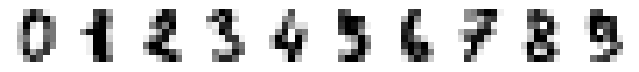

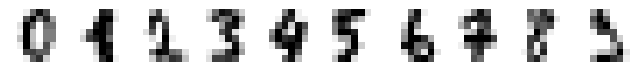

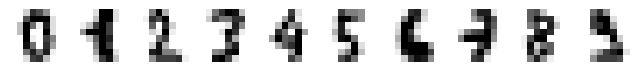

In [1]:
# 필요한 라이브러리와 데이터를 로드합니다.
from sklearn.datasets import load_digits

# 데이터를 로드합니다.
digits = load_digits()
X, y = digits.data, digits.target

# 숫자 이미지 30개를 출력해 봅니다.
%matplotlib inline
import matplotlib.pyplot as plt

N = 30
nrows = (N // 10)
for row in range(nrows):
    plt.figure(figsize=(8, 8))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(digits.images[i + row * 10], cmap=plt.cm.gray_r,
                   interpolation='nearest') # 각 숫자 이미지를 회색조로 출력
        plt.axis("off") # 축 정보는 숨깁니다.
    plt.show()

#### `validation_curve` 실행 및 결과 시각화

In [2]:
import numpy as np

# gamma 값의 탐색 범위를 10^-6 에서 10^-1 사이의 10개 지점으로 설정합니다.
param_range = np.logspace(-6, -1, 10)

# validation_curve를 실행합니다.
# 컴퓨터 성능에 따라 1분 이상 소요될 수 있습니다.
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1) # 10-fold 교차 검증 사용

In [4]:
import numpy as np

# 훈련 점수와 검증 점수의 평균과 표준편차를 계산합니다.
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

- 계산된 값을 이용해 검증 곡선(Validation Curve)을 그림.

<!-- end list -->

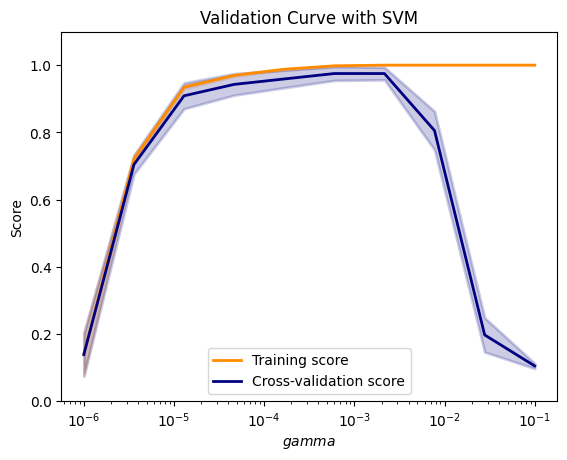

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.title("Validation Curve with SVM")
plt.xlabel("$gamma$") # x축 라벨
plt.ylabel("Score")   # y축 라벨
plt.ylim(0.0, 1.1)    # y축 범위
lw = 2

# 훈련 점수 그래프
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw) # 표준편차 영역 표시

# 교차 검증 점수 그래프
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw) # 표준편차 영역 표시

plt.legend(loc="best")
plt.show()

- **그래프 해석**:
      - **낮은 `gamma` (왼쪽)**: 훈련 점수와 검증 점수가 모두 낮아 **과소적합(Underfitting)** 상태.
      - **높은 `gamma` (오른쪽)**: 훈련 점수는 높지만 검증 점수는 낮아 **과대적합(Overfitting)** 상태.
      - **중간 영역**: 훈련 점수와 검증 점수가 모두 높은 최적의 `gamma` 값 후보 구간.

#### 최적 파라미터로 모델 재학습

In [6]:
# 검증 점수 평균이 가장 높은 지점의 gamma 값을 찾습니다.
best_gamma = param_range[test_scores_mean.argmax()]
print(f"Best gamma: {best_gamma}")

from sklearn.svm import SVC

# 찾은 최적의 gamma 값으로 새로운 모델을 생성하고 학습합니다.
model = SVC(gamma=best_gamma).fit(X, y)
model

Best gamma: 0.0021544346900318843


SVC(gamma=np.float64(0.0021544346900318843))

### 2\. `GridSearchCV`를 이용한 복수 파라미터 최적화

  - `GridSearchCV`는 여러 파라미터를 동시에 탐색하는 클래스.
  - 레드 와인 품질 데이터에서 사용할 변수 개수(`k`)와 `SVC` 모델의 규제 파라미터 `C`를 동시에 최적화.

<!-- end list -->

In [7]:
# 필요한 라이브러리들을 import 합니다.
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest

# 데이터를 로드하고 피처(X)와 타겟(y)으로 분리합니다.
redwine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', delimiter=';')
redwine_X, redwine_y = redwine.iloc[:, :-1], redwine.iloc[:, -1]

# 파이프라인 단계를 정의합니다.
selection = SelectKBest(k=1) # 1. k개의 최상위 특성 선택
svm = SVC(kernel="linear")   # 2. 선형 SVM 모델로 분류

# 파이프라인을 구축합니다.
pipeline = Pipeline([("univ_select", selection), ("svm", svm)])

# 탐색할 파라미터 그리드를 정의합니다.
# univ_select 단계의 k 파라미터: 4부터 11까지
# svm 단계의 C 파라미터: 0.1, 1, 10
param_grid = dict(univ_select__k=[4, 5, 6, 7, 8, 9, 10, 11],
                    svm__C=[0.1, 1, 10])

# GridSearchCV 객체를 생성합니다.
# 총 8(k) * 3(C) * 2(cv) = 48회의 학습이 수행됩니다.
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=2, verbose=10)

# 그리드 탐색을 실행합니다.
grid_search.fit(redwine_X, redwine_y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 1/2; 1/24] END svm__C=0.1, univ_select__k=4;, score=0.516 total time=   0.0s
[CV 2/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 2/2; 1/24] END svm__C=0.1, univ_select__k=4;, score=0.584 total time=   0.1s
[CV 1/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 1/2; 2/24] END svm__C=0.1, univ_select__k=5;, score=0.516 total time=   0.0s
[CV 2/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 2/2; 2/24] END svm__C=0.1, univ_select__k=5;, score=0.589 total time=   0.1s
[CV 1/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 1/2; 3/24] END svm__C=0.1, univ_select__k=6;, score=0.519 total time=   0.3s
[CV 2/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 2/2; 3/24] END svm__C=0.1, univ_select__k=6;

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('univ_select', SelectKBest(k=1)),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'univ_select__k': [4, 5, 6, 7, 8, 9, 10, 11]},
             verbose=10)

- 최적의 파라미터 조합 확인.

<!-- end list -->

In [8]:
# 최적의 파라미터 조합을 출력합니다.
grid_search.best_params_

{'svm__C': 1, 'univ_select__k': 9}

### 3\. `ParameterGrid`

  - 파라미터 조합의 격자를 직접 생성해 주는 클래스.

<!-- end list -->

In [9]:
from sklearn.model_selection import ParameterGrid

# 파라미터 a와 b의 조합을 생성합니다.
param_grid = {'a': [1, 2], 'b': [True, False]}
list(ParameterGrid(param_grid))

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

- 조건부 파라미터 조합 생성.

<!-- end list -->

In [10]:
# 조건부 파라미터 그리드를 생성합니다.
param_grid = [{'kernel': ['linear']},
              {'kernel': ['rbf'], 'gamma': [1, 10]}]
grid = list(ParameterGrid(param_grid))
print(grid)

[{'kernel': 'linear'}, {'gamma': 1, 'kernel': 'rbf'}, {'gamma': 10, 'kernel': 'rbf'}]


### 4\. 병렬 처리를 이용한 탐색 속도 향상

  - `validation_curve`와 `GridSearchCV`는 `n_jobs` 인자를 통해 여러 CPU 코어를 사용한 병렬 처리로 탐색 속도를 크게 향상시킬 수 있음. `n_jobs=-1`은 모든 코어를 사용.

### 5\. `Pipeline`과 `GridSearchCV`를 이용한 차원 축소 기법 비교

  - `GridSearchCV`와 `Pipeline`을 결합하면 차원 축소 기법과 분류 모델의 하이퍼파라미터를 동시에 최적화하는 강력한 워크플로우를 구성 가능.

<!-- end list -->

In [11]:
%%time
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

# 파이프라인 정의: 1. 차원축소 -> 2. 분류
pipe = Pipeline([
    ('reduce_dim', None), # 이 단계는 아래 param_grid에 의해 채워짐
    ('classify', LinearSVC())
])

# 탐색할 파라미터 그리드 정의
N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()], # PCA와 NMF 시도
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)], # SelectKBest(chi2) 시도
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]

# GridSearchCV 객체 생성 및 실행
grid = GridSearchCV(pipe, cv=5, n_jobs=-1, param_grid=param_grid)
digits = load_digits()
grid.fit(digits.data, digits.target)

CPU times: user 539 ms, sys: 38.8 ms, total: 578 ms
Wall time: 8.85 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('reduce_dim', None),
                                       ('classify', LinearSVC())]),
             n_jobs=-1,
             param_grid=[{'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [PCA(iterated_power=7), NMF()],
                          'reduce_dim__n_components': [2, 4, 8]},
                         {'classify__C': [1, 10, 100, 1000],
                          'reduce_dim': [SelectKBest(score_func=<function chi2 at 0x7a7e36395bc0>)],
                          'reduce_dim__k': [2, 4, 8]}])

-----

## 4\. 핵심 요약

  - **비즈니스 관점**: 모델의 기본 성능에 만족하지 말고, **`GridSearchCV`** 같은 파라미터 탐색 기법으로 모델 예측력을 체계적으로 개선하여 직접적인 비즈니스 가치를 창출해야 함.
  - **기술 관점**: 단일 파라미터 영향 분석 및 과적합 진단에는 \*\*`validation_curve`\*\*를, 여러 파라미터의 최적 조합 탐색에는 \*\*`GridSearchCV`\*\*를 사용하는 것이 표준적인 접근 방식임.
  - **프로세스 관점**: \*\*`Pipeline`\*\*을 사용해 데이터 전처리와 모델 학습을 하나의 절차로 묶고, 이를 \*\*`GridSearchCV`\*\*와 결합하면 전체 머신러닝 워크플로우를 한 번에 최적화하여 \*\*데이터 누수(Data Leakage)\*\*를 방지하고 재현성 높은 코드를 작성할 수 있음.